<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/6_seminario%206%3A%20time_series_basics/6_seminario_time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=-sNbp4PIuV4)

<img src = 'https://github.com/marco-canas/investigacion_dengue/blob/main/machine_learning/images/calculo_diferencial_2023-09-22%20at%2012.12.55%20PM.jpeg?raw=true'>

# Seminario en Machine learning para SAT-dengue

## Objetivo

* Obtención de los datos de las estaciones del proyecto Antioquia mira su cielo [(AMSC)](http://54.146.188.73:8501/)



In [1]:
# Mapa conceptual

import networkx as nx 

## Obtención y visualización de los datos de AMSC

In [1]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/A2023M1_to_M9/marco_2023-09-22_20_13_29(1).csv'

df = pd.read_csv(url)

In [2]:
df.head() 

,Unnamed: 0,fecha,nombre_completo,estado,temperatura
0,0,2023-09-19 03:50:00,UdeA Yarumal,Habilitada,14.88889
1,1,2023-09-19 10:50:00,UdeA Yarumal,Habilitada,19.44444
2,2,2023-09-19 10:51:00,UdeA Yarumal,Habilitada,19.38889
3,3,2023-09-19 10:52:00,UdeA Yarumal,Habilitada,19.27778
4,4,2023-09-19 10:53:00,UdeA Yarumal,Habilitada,19.27778


In [3]:
df.keys()


Index(['Unnamed: 0', 'fecha', 'nombre_completo', 'estado', 'temperatura'], dtype='object')

In [4]:
df.temperatura

0         14.88889
1         19.44444
2         19.38889
3         19.27778
4         19.27778
            ...   
273028    15.88889
273029    15.88889
273030    15.88889
273031    15.94444
273032    15.94444
Name: temperatura, Length: 273033, dtype: float64

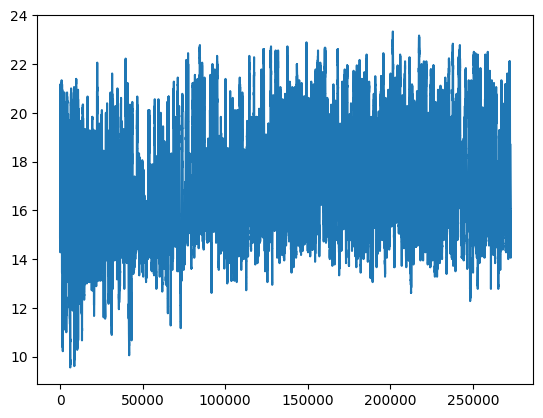

In [6]:
import matplotlib.pyplot as plt

plt.plot(df.temperatura)

plt.savefig('/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/temperatura_yarumal_2023.jpg')




## Time Series según Wes

## 11.2 Time Series Basics


A basic kind of time series object in pandas is a Series indexed by timestamps, which
is often represented external to pandas as Python strings or datetime objects:

In [3]:
import numpy as np 
import pandas as pd 
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8),
datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


2011-01-02   -0.941707
2011-01-05    0.039077
2011-01-07    0.213146
2011-01-08   -1.734087
2011-01-10    0.367762
2011-01-12   -0.682196
dtype: float64

In [ ]:

2011-01-02

# Máquinas de soporte vectorial según Geron

Página 219  

Capítulo 5. 

# Chapter 5. Support Vector Machines


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model,
capable of performing linear or nonlinear classification, regression, and even outlier
detection. It is one of the most popular models in Machine Learning, and anyone interested
in Machine Learning should have it in their toolbox. SVMs are particularly well suited for
classification of complex small- or medium-sized datasets.
This chapter will explain the core concepts of SVMs, how to use them, and how they work.

# Linear SVM Classification


The fundamental idea behind SVMs is best explained with some pictures. Figure 5-1 shows
part of the iris dataset that was introduced at the end of Chapter 4. The two classes can
clearly be separated easily with a straight line (they are linearly separable). The left plot
shows the decision boundaries of three possible linear classifiers. The model whose
decision boundary is represented by the dashed line is so bad that it does not even separate
the classes properly. The other two models work perfectly on this training set, but their
decision boundaries come so close to the instances that these models will probably not
perform as well on new instances. In contrast, the solid line in the plot on the right
represents the decision boundary of an SVM classifier; this line not only separates the two
classes but also stays as far away from the closest training instances as possible. You can
think of an SVM classifier as fitting the widest possible street (represented by the parallel
dashed lines) between the classes. This is called large margin classification.

# Referencias

* Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc.".](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694149999&Signature=MH1uVxkUnFgwepQUeb-3OdFgQWj0vmtzC4ra~TZ-xyCstLSCg7uaNeDi4yrXghoJ6UEMCGOJkx2s13vayVVP-IzF8I91v6TeW0ZUeIejbWlrkHxtT01V-fJ6q7C~9buozUwVr~o2BY3llLH5rZVlZF31pPefEm3ejjlW8pO~prbQ8VVfyfXs4HzSIQJ~nbTCZU8LfqYwU3yMLV7IH4TQN9eGd8GZuqHjznUJZU995AwYqQqzl5-Xtoz93-S1Pn2UWuS8SsXmFt1ysr~-M7-6lVQw~E9~MFbdCIQRfp~fRtVtHDfB-mEXNEQ1CX518xUB0xT3JtfZdsGArib9UMwOqg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

<img src = 'https://wesmckinney.com/images/wes-2017-01-12-small.png'>